# CSE2530 Computational Intelligence
## Assignment 1: Artificial Neural Networks

<div style="background-color:#f0e7d1">

_Fill in your group number **from Brightspace**, names, and student numbers._
    
|    Group                 |           11         |
|------------|----------------------|
| Cosmin Andrei Vasilescu  |        5734975       |
| Traian Dobrin|        5749751       |
| Vlad Alexan  |        5773644       |
| Andrei Ionita  |      5735327     |

#### Imports

In [302]:
# You may only use numpy to implement your neural network
# You are not allowed to use scikit-learn, other than for Section 1.6.
# You are also not allowed to use Pytorch, Tensorflow, and similar machine learning frameworks.
# You can make use of any other libraries for miscellaneous functions, e.g. to create the visual aids.

# Put all of your imports in this code block
import numpy as np
import matplotlib.pyplot as plt
import math

# For reproducibility, we set a specific seed to np.random
np.random.seed(225200)
print("started")

started


#### Loading the data

In [303]:
features = np.genfromtxt("features.txt", delimiter=",")
targets = np.genfromtxt("targets.txt", delimiter=",")
unknown = np.genfromtxt("unknown.txt", delimiter=",")

## 1 Questions
### 1.2 Architecture
#### Question 1:

In [304]:
class SimplePerceptron:
    def __init__(self, learning_rate=0.1):
        #initializing the weights and bias with random values
        self.w1=np.random.uniform(low=0.0,high=1.0)
        self.w2=np.random.uniform(low=0.0,high=1.0)
        self.bias=0.5
        self.learning_rate=learning_rate
        
    #forward propagation function
    def infer(self,data):
        z=self.w1*data[0]+self.w2*data[1]+self.bias
        pred=self.activation_function(z)
        return pred
    
    #activation function
    def activation_function(self, x):
        if x>=0:
            return 1
        return 0
    
    '''-losses_per_epoch keeps track of the absolute value of all the losses, for plotting purposes
       -the function works by going through the labels and features given and computing the loss, and finally updating
        the weights after each row of data'''
    
    def train(self,epochs,features,labels):
        losses_per_epoch = []
        for i in range(epochs):
            total_loss=0
            for x,y in zip(features,labels):
                pred = self.infer(x)
                loss=y-pred
                total_loss += abs(loss)
                self.backpropagate(loss,x)
            losses_per_epoch.append(total_loss)
        return losses_per_epoch
    
    #backpropagation function
    def backpropagate(self,loss,instance):
        self.w1+=self.learning_rate*instance[0]*loss
        self.w2+=self.learning_rate*instance[1]*loss
        self.bias+=self.learning_rate*loss    

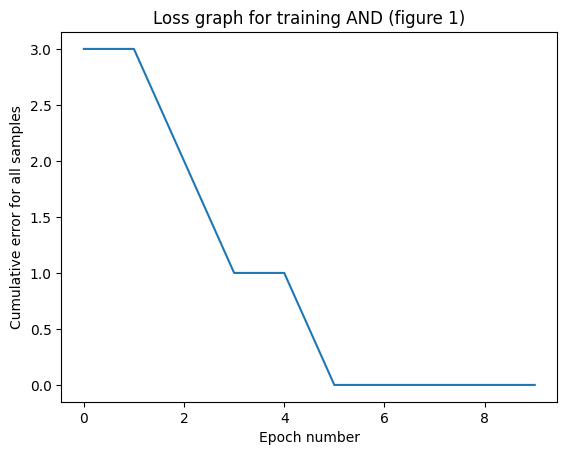

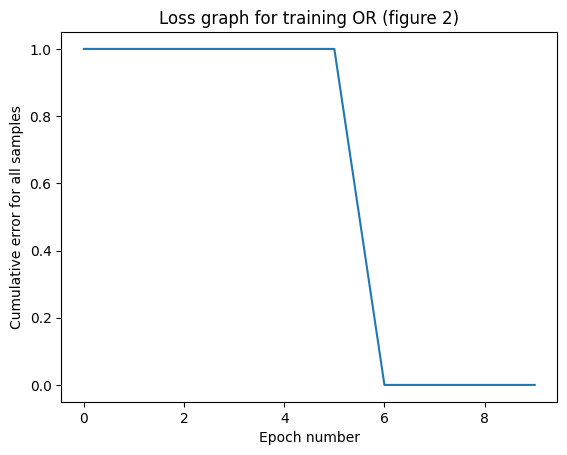

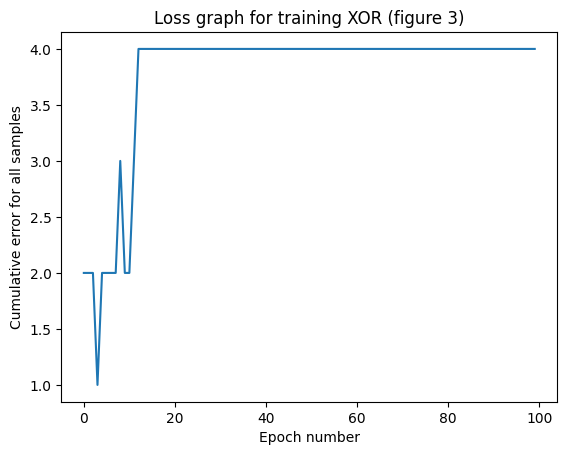

In [305]:
#input data represented by all possible combinations of two input values of 0 and 1
#labels represent the correct values given the inputs
binary_features=[[0,0],[0,1],[1,0],[1,1]]
labelsAND=[0,0,0,1]
labelsOR=[0,1,1,1]
labelsXOR=[0,1,1,0]
operation_index = 0

#general training and plotting function
def train_and_plot(labels, operation, features = binary_features, no_epochs = 10):
    p = SimplePerceptron()
    global operation_index
    operation_index+=1
    losses = p.train(no_epochs,features,labels)
    plt.xlabel("Epoch number")
    plt.ylabel("Cumulative error for all samples")
    plt.title("Loss graph for training " + operation + " (figure " + str(operation_index) + ")")
    plt.plot(np.arange(no_epochs),losses)
    plt.show()
    
train_and_plot(labelsAND, "AND")
train_and_plot(labelsOR, "OR")
train_and_plot(labelsXOR, "XOR", no_epochs = 100)

<div style="background-color:#f0e7d1">

As we can see from the plots, for the AND and OR operations, our perceptron is able to learn the correct values for the weights and the bias in order to be able to correctly simulate the operations, converging to a 0 loss (see figure 1 and 2). However, with only one perceptron, we are essentially training a linear classifier, and, since the XOR labels are not linearly separable (see figure 4 below), it is (mathematically) impossible to have a zero-loss perceptron, even with a high number of epochs - we never reach a zero loss (see figure 3).

<figure>
  <img
  src="f4.png"
  alt="figure 4">
  <figcaption>Simulating the XOR operation is only possible with a non-linear classifier (figure 4)</figcaption>
</figure>


#### Question 2

<div style="background-color:#f0e7d1">

For our task, we will need 10 input neurons. Each input neuron will correspond to one of the features of the samples we will be trying to classify.

#### Question 3

<div style="background-color:#f0e7d1">

We will need 7 output neurons. Each output neuron will correspond to one of the classes we will be trying to classify our samples in.

#### Question 4

<div style="background-color:#f0e7d1">

Our initial guess is that we should use 2 hidden layers: the first will have 9 neurons and the second will have 8. The idea is that we are starting with 10 initial neurons in the first layer and want to finish with 7 in the final layer. This guess is also partly based on the idea that a (perhaps more complex) MLP classifying hand written digits can also work with just 2 hidden layers.

#### Question 5

<div style="background-color:#f0e7d1">

We will be using ReLU as an activation function, because it is computationally efficient and we will not have to worry about gradients becoming too small and eventually  “vanishing”. It will also make the network be able to handle non-linearity and detect more complex patterns in the data. For the last output layer, we will additionally apply a softmax activation function on our outputs in order to get a more informative output, using mutually exclusive labels for our multiclass classfication.

#### Question 6

<div style="background-color:#f0e7d1">

<figure>
  <img
  src="scheme.jpg"
  alt="figure 5"
  style="width: 600px">
  <figcaption>Initial diagram of our network (figure 5)</figcaption>
</figure>

### 1.3 Training

When coding a neural network from scratch, it helps to think of a layer as an individual component that can be easily combined with other layers. To help you create a modular implementation of a neural network, we provide you with a template for the implementation along with some explanations.

**Note that using the template below is not mandatory. You may choose to modify this template or implement your own version of the neural network altogether. If the latter, please remove our template from the notebook and ensure that it instead includes a complete, fully functional implementation of your own.**

**Linear (fully connected) layer**

A linear or fully connected layer maps the input data to an output by performing a linear transformation, where each input neuron is connected to every output neuron. The forward pass of a linear layer is computed as $y = wx + b$, where $w$ and $b$ are trainable parameters. The gradients of the loss with respect to $w$ and $b$ are defined using the chain rule:

$$\frac{\partial \mathcal{L}}{\partial w}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial w}, \quad \frac{\partial \mathcal{L}}{\partial b}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial b}, $$

where $\frac{\partial \mathcal{L}}{\partial y}$ is the upstream gradient i.e., the gradient flowing from deeper layers into the current layer, and the other two terms are the local gradients:

$$
\frac{\partial y}{\partial w}=x, \quad \frac{\partial y}{\partial b}=1.
$$

Since $x$ is needed to compute the gradients, we can store (cache) its value during the forward pass. Finally, we need to return a downstream gradient so that more shallow layers can use it as their upstream gradient. The downstream gradient of a layer is simply its upstream gradient multiplied by the local gradient of its ouput with respect to its input:

$$
\frac{\partial \mathcal{L}}{\partial x}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

**Note.** Be aware of how you multiply the arrays, it might be useful to print the shapes of each array and to think about the desired shape of the output.  

In [306]:
class Linear:
    def __init__(self, in_features, out_features, af):
        """ Randomly initialize the weights and biases.

        Args:
            in_features: number of input features.
            out_features: number of output features.
        """
        self.weight = np.random.rand(out_features,in_features)
        self.bias = np.zeros((out_features,1))
        self.activation_function = af

        self.z = None
        self.activation = None
        self.weight_grad = None
        self.bias_grad = None

    def forward(self, x):
        """ Perform the forward pass of a linear layer. 
        Store (cache) the input, so it can be used in the backward pass.
        
        Args:
            x: input of a linear layer.

        Returns: 
            y: output of a linear layer. 
        """
        # self.cache = np.array(x)
        # return self.weight @ self.cache + self.bias
        self.z = self.weight @ x + self.bias
        self.activation = self.activation_function(self.z)
        return self.activation
    
    def backward(self, dupstream):
        
        """ Perform the backward pass of a linear layer.  

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        
        delta = self.weight.T @ relu_prime(self.z)
        
        dx = (self.weight.T @ dupstream)

        du = dupstream.T.reshape((len(dupstream.T),1)).T
        sc = self.cache.reshape((len(self.cache),1))
        # print(du.shape)
        # print(sc.shape)
        self.weight_grad = sc@du
        self.bias_grad = dupstream
        return dx

**Activation functions**

You alo need to implement an activation function suitable for the task at hand.

Think about how to perform the backward pass i.e., what is the local gradient and what the downstream gradient should be. Do not forget to take the upstream gradient into account.

In [307]:
def relu(x):
    return np.where(x > 0, x, 0.0)

def relu_prime(x):
    return np.where(x > 0, 1.0, 0.0)

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def leaky_relu(x, alpha=0.1):
    return max(x, alpha * x)

def softmax(x):
    normalised_exp = np.exp(x - np.max(x))
    return normalised_exp / np.sum(normalised_exp, axis=0)
    # Example usage:
    # x = np.array([1, 2, 3])
    # result = softmax(x)
    # print(result)
    # [0.09003057 0.24472847 0.66524096]

In [308]:
# class Activation:
#     def __init__(self):
#         self.cache = None
#     
#     def forward(self, x):
#         """ Perform a forward pass of your activation function.
#         Store (cache) the output so it can be used in the backward pass.
# 
#         Args:
#             x: input to the activation function. 
# 
#         Returns:
#             y: output of the activation function.
#         """
#         ans=[]
#         for i in x:
#             ans.append(max(0.0, i))
#         self.cache=np.array(ans)
#         return ans
#     
#     def backward(self, dupstream): 
#         """ Perform a backward pass of the activation function. 
#         Make sure you do not modify the original dupstream.
# 
#         Args:
#             dupstream: upstream gradient. 
# 
#         Returns:
#             dx: downstream gradient.
#         """
#         return np.array(dupstream*[1 if x>0 else 0 for x in self.cache])

**Network** 

Now that you have implemented a `Linear` layer and an activation function, you can combine them in different ways and have the `Network` class perform forward and backward passes through all layer of the network in the specified order.

Additionally, you should make the `Network` class update all the trainable parameters of the network in `optimizer_step`.

In [320]:
class Network:
    def __init__(self, sizes, af):
        self.layers = []
        self.last_input = None
        for i in range(1,len(sizes)):
            self.layers.append(Linear(sizes[i-1], sizes[i], af))
        # self.activations = []
        # for i in range(len(sizes)):
        #     self.activations.append(Activation())

    def forward(self, x):
        """ Perform a forward pass over the entire network.

        Args:
            x: input data. 

        Returns:
            y: predictions.
        """
        self.last_input = x
        cur_data = x
        for l in self.layers:
            cur_data=l.forward(cur_data)
        return cur_data
    
    def backward(self, dupstream):
        """ Perform a backward pass over the entire network.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        last_layer = self.layers[-1]
        pen_last_layer = self.layers[-2]
        delta = dupstream * relu_prime(last_layer.z)
        last_layer.bias_grad = delta
        last_layer.weight_grad = delta @ pen_last_layer.activation.T
        
        for index in range(2, len(self.layers)):
            rp = relu_prime(self.layers[-index].z)
            delta = (self.layers[-index+1].weight.T @ delta) * rp
            self.layers[-index].bias_grad = delta
            self.layers[-index].weight_grad = delta @ self.layers[-index-1].activation.T
        
        
        rp = relu_prime(self.layers[0].z)
        delta = (self.layers[1].weight.T @ delta) * rp
        self.layers[0].bias_grad = delta
        self.layers[0].weight_grad = delta @ self.last_input.T
    
    def optimizer_step(self, lr):
        """ Update the weight and bias parameters of each layer.

        Args:
            lr: learning rate.
        """
        for i,l in enumerate(self.layers):
            print(len(self.layers))
            print(i)
            l.weight -= lr * l.weight_grad
            l.bias -= lr * l.bias_grad

**Loss function**

You also need to implement a loss function that will measure how well your neural network performs at the task.

In [319]:
def Loss(y_true, y_pred):
    """ Computes the value of the loss function and its gradient.  

    Args:
        y_true: ground truth labels.
        y_pred: predicted labels.

    Returns:
        loss: value of the loss. 
        grad: gradient of loss with respect to the predictions. 
    """
    return np.mean((y_true-y_pred)**2),2*(y_true-y_pred)

**Training loop**

Finally, define a training loop in which for each optimizer step you:

1. Obtain the predictions by performing a forward pass of the network;

2. Compute the loss and its gradient by comparing the predictions with the ground truth according to the selected criterion;

3. Perform a backward pass of the network;

4. Update all parameters of the network i.e, take an optimizer step.

In [ ]:
def train(net, train_inputs, train_labels, validation_inputs, validation_labels, criterion, learning_rate, no_epochs):
    """Trains the neural network.

    Args:
        net: network or model. 
        inputs: input data.
        labels: labels. 
        criterion: loss function.
        lr: learning rate.

    Returns:
        losses: a list containing the loss at every optimizer step. 
        accuracies: a list containing the accuracy at every optimizer step.
    """
    losses_train = []
    losses_validation = []
    weights_per_epoch = []
    for epochs_index in range(no_epochs):
        loss_epoch = []
        validation_epoch = []

        for x,y in zip(train_inputs,train_labels):
            x = x.reshape((10,1))
            y = y.reshape((7,1))
            pred = net.forward(x)
            
            loss, delta = criterion(y,pred)
            loss_epoch.append(loss)
            net.backward(delta)
            net.optimizer_step(learning_rate)
        
        for x,y in zip(validation_inputs,validation_labels):
            pred=net.forward(x)
            loss, grad=criterion(y,pred)
            validation_epoch.append(loss)
        
        weights_per_epoch.append(np.copy(net.layers))
        losses_train.append(np.mean(loss_epoch))
        losses_validation.append(np.mean(validation_epoch))
    return (losses_train,losses_validation,weights_per_epoch)

In [312]:
def to_one_hot(labels):
    # Converting to one-hot encodings
    num_classes = len(set(labels))
    one_hot_labels = np.zeros((len(labels), num_classes))
    one_hot_labels[np.arange(len(labels), dtype = int), labels.astype(int) - 1] = 1
    return one_hot_labels

#### Question 7

In [313]:
def partition_data(features, labels, training_percentage, validation_percentage):
    n = len(features)
    labeled_data = np.concatenate((features, labels.reshape(n, 1)), axis = 1)
    np.random.shuffle(labeled_data)
    no_training_samples = int(training_percentage * n)
    no_validation_samples = int(validation_percentage * n)
    training_samples = np.array(labeled_data[:no_training_samples])
    validation_samples = np.array(labeled_data[no_training_samples:no_training_samples+no_validation_samples])
    test_samples = np.array(labeled_data[no_training_samples+no_validation_samples:])
    return (training_samples, validation_samples, test_samples)

training_samples, validation_samples, test_samples = partition_data(features, targets, 0.70, 0.15)

print(training_samples.shape)
print(validation_samples.shape)
print(test_samples.shape)

(5497, 11)
(1178, 11)
(1179, 11)


|<div style="background-color:#f0e7d1">

We will divide the data into 3 sets: one set will be the training set, one will be the validation set and one will be the test set. The training set will be used to effectively train the network. The validation set will help us in selecting suitable hyperparameters such as the number of neurons in a layer or the number of layers. The testing set will be used to ultimately measure the performance of the network with the choices of parameters that we made. The training set will be ~70% of the data, the validation set ~15% and the test set 15%. Then, the training set is going to be split into mini-batches. In the training steps, the weights will be updated after processing the batch. After processing all batches, reshuffle the training set and repeat the process.

#### Question 8

In [314]:
# def evaluate (test_data, layers):
#     network = Network(layers)
#     test_input = test_data[:,:10]
#     test_labels = test_data[:,10]
#     print(test_input.shape)
#     print(test_input[0])
#     print(test_labels.shape)
#     print(test_labels[0])
#     print(test_data[0])
#     no_test_samples = len(test_data)
#     predictions = network.forward(test_input)
#     no_correct_predictions = sum(predictions == test_labels)
#     accuracy = no_correct_predictions / no_test_samples
#     return accuracy

In [315]:
#evaluate(test_samples, 10)

<div style="background-color:#f0e7d1">

To calculate the performance of the network we will count the number of misclassified objects from the test set. Then we divide this number by the total number of objects in the test. We could multiply by 100 to get a percentage of misclassified objects. That would be the final evaluation of a network. We expect this to be as close to a unbiased evaluation as possible, since the network would not have seen at all the data in the test set.

#### Question 9

<div style="background-color:#f0e7d1">

We will measure the loss function at each epoch and compare it to its previous value. If the difference is below a certain threshold we will stop, since the progress made in the last step is not significant enough. We also stop after a certain number of iterations (epochs) has been reached, if we have not stopped beforehand.

#### Question 10

In [316]:
loss,validation,w = train(
    Network([10,9,8,7], relu),
    training_samples[:,:10],
    to_one_hot(training_samples[:,10]),
    validation_samples[:,:10],
    to_one_hot(validation_samples[:,10]),
    Loss,
    0.01,
    10)
# plt.plot(np.arange(len(loss)), loss)
print(loss)

3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0


C:\Users\Andrei\AppData\Local\Temp\ipykernel_30460\2448299732.py:30: RuntimeWarning: overflow encountered in matmul
  self.z = self.weight @ x + self.bias
C:\Users\Andrei\AppData\Local\Temp\ipykernel_30460\2448299732.py:30: RuntimeWarning: invalid value encountered in matmul
  self.z = self.weight @ x + self.bias
C:\Users\Andrei\AppData\Local\Temp\ipykernel_30460\3548800545.py:43: RuntimeWarning: invalid value encountered in matmul
  delta = (self.layers[-index+1].weight.T @ delta) * rp


3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0
3
1
3
2
3
0


ValueError: operands could not be broadcast together with shapes (7,) (7,9) 

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

### 1.4 Optimization

#### Question 11

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 12

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

### 1.5 Evaluation

#### Question 13

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 14

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 15

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

### 1.6 Scikit-learn

#### Question 16

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 17

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

### 1.7 Reflection

#### Question 18

<div style="background-color:#f1be3e">

_Write your answer here._

#### Question 19

<div style="background-color:#f1be3e">

_Write your answer here._

### 1.8 Pen and paper

#### Question 20

<div style="background-color:#f1be3e">

_Write your answer here. You can also choose to simply include a photo of your solution._

#### Question 21

<div style="background-color:#f1be3e">

_Write your answer here. You can also choose to simply include a photo of your solution._

### 1.9 Division of work

#### Question 22

<div style="background-color:#f1be3e">


|          Component          |  Name A   |  Name B   |  Name C   |  Name D   |
|-----------------------------|-----------|-----------|-----------|-----------|
| Code (design)               |     A     |     B     |     C     |     D     |
| Code (implementation)       |     A     |     B     |     C     |     D     |
| Code (validation)           |     A     |     B     |     C     |     D     |
| Experiments (execution)     |     A     |     B     |     C     |     D     |
| Experiments (analysis)      |     A     |     B     |     C     |     D     |
| Experiments (visualization) |     A     |     B     |     C     |     D     |
| Report (original draft)     |     A     |     B     |     C     |     D     |
| Report (reviewing, editing) |     A     |     B     |     C     |     D     |

### References

<div style="background-color:#f1be3e">

**If you made use of any non-course resources, cite them below.**